In [5]:
from datetime import datetime
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

import statsmodels.api as sm
import warnings
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [6]:
# load dataset
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

# Load your dataset here
dataset = read_csv("../../csv/Beras.csv", header=0, index_col=0, parse_dates=True, date_parser=parser)

/var/folders/3s/37cdhq1x7fdcds5p4y_vnbp00000gn/T/ipykernel_7308/2367751130.py:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  dataset = read_csv("../../csv/Beras.csv", header=0, index_col=0, parse_dates=True, date_parser=parser)


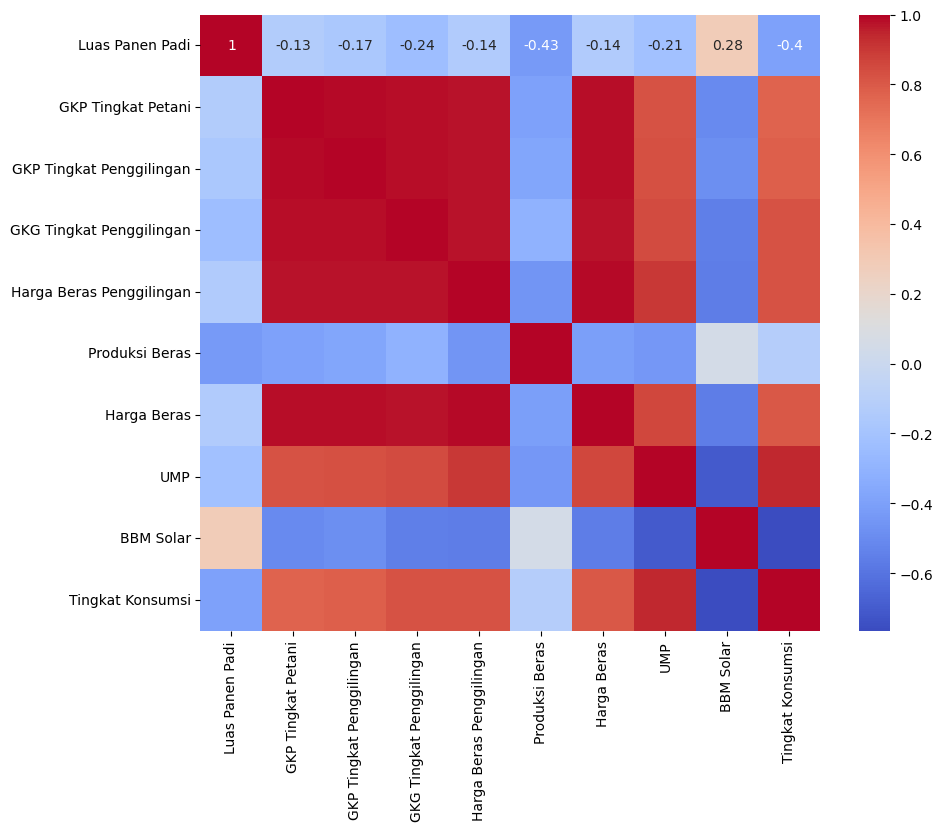

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the Pearson correlation coefficient for the dataset
correlation_matrix = dataset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

# Now you can use train_test_split
train_data, test_data = train_test_split(dataset, test_size=0.2, shuffle=False)

In [9]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            print(f"Trying parameters {param} and seasonal parameters {param_seasonal}")
            temp_model = sm.tsa.statespace.SARIMAX(train_data['Harga Beras'],
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = temp_model.fit()

            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                print(f"New best model: SARIMAX{best_pdq}x{best_seasonal_pdq}12 - AIC:{best_aic}")
        except Exception as e:
            print(f"Error with parameters {param} and seasonal parameters {param_seasonal}: {e}")
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Trying parameters (0, 0, 0) and seasonal parameters (0, 0, 0, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07541D+01    |proj g|=  9.23706D-09

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   9.237D-09   1.075D+01
  F =   10.754072660437332     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
New best model: SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:11659.414763914068
Trying parameters (0, 0, 0) and seasonal parameters (0

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so wil


At iterate   10    f=  5.71722D+00    |proj g|=  1.32788D-02
New best model: SARIMAX(0, 0, 0)x(0, 1, 1, 12)12 - AIC:6201.3784414970505
Trying parameters (0, 0, 0) and seasonal parameters (1, 0, 0, 12)

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     14     17      1     0     0   3.443D-06   5.717D+00
  F =   5.7171387836688661     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.81694D+00    |proj g|=  7.56

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding e

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.95821D+00    |proj g|=  1.69761D+00

At iterate    5    f=  5.70731D+00    |proj g|=  5.88139D-02

At iterate   10    f=  5.70623D+00    |proj g|=  4.29190D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     14      1     0     0   4.295D-05   5.706D+00
  F =   5.7062306019999571     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
New best model: SARIMAX(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6191.5539725679

 This problem is unconstrained.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Trying parameters (0, 0, 1) and seasonal parameters (0, 0, 1, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01014D+01    |proj g|=  1.29819D-01

At iterate    5    f=  1.00479D+01    |proj g|=  2.13615D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     10      1     0     0   7.762D-05   1.005D+01
  F =   10.047936707928921     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Trying parameters (0, 0, 1) and seasonal parameters (0, 1, 0, 12)


/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so wil


At iterate    5    f=  5.59603D+00    |proj g|=  1.78736D-03

At iterate   10    f=  5.59416D+00    |proj g|=  4.09636D-02

At iterate   15    f=  5.58754D+00    |proj g|=  1.27561D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     20      1     0     0   2.730D-06   5.588D+00
  F =   5.5875333947488226     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
New best model: SARIMAX(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6062.8861999077235
Trying parameters (0, 0, 1) and seasonal parameters (1, 0, 0, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  1.00316D+01    |proj g|=  8.17331D-02

At iterate   20    f=  9.78318D+00    |proj g|=  4.87296D-01

At iterate   25    f=  6.30249D+00    |proj g|=  1.22319D+01

At iterate   30    f=  5.82621D+00    |proj g|=  6.34761D-01

At iterate   35    f=  5.70657D+00    |proj g|=  2.37709D-01

At iterate   40    f=  5.70064D+00    |proj g|=  8.22156D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     44    101      1     0     0   2.207D-04   5.700D+00
  F =   5.7004528606134750     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Trying parameters (0, 0, 1) and seasonal parameters

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00099D+01    |proj g|=  9.03545D-03

At iterate    5    f=  1.00088D+01    |proj g|=  5.73223D-04

At iterate   10    f=  1.00087D+01    |proj g|=  2.32075D-03

At iterate   15    f=  1.00087D+01    |proj g|=  2.10433D-04

At iterate   20    f=  1.00085D+01    |proj g|=  1.71481D-02

At iterate   25    f=  9.98907D+00    |proj g|=  6.22592D-02

At iterate   30    f=  9.91596D+00    |proj g|=  1.92579D-01

At iterate   35    f=  7.06358D+00    |proj g|=  6.35575D+00

At iterate   40    f=  5.94723D+00    |proj g|=  1.68519D+01

At iterate   45    f=  5.67719D+00    |proj g|=  6.00677D-01

At iterate   50    f=  5.67624D+00    |proj g|=  8.39633D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forec


At iterate    5    f=  5.60846D+00    |proj g|=  3.07732D-02

At iterate   10    f=  5.59579D+00    |proj g|=  4.82470D-03

At iterate   15    f=  5.59520D+00    |proj g|=  2.01296D-02

At iterate   20    f=  5.58749D+00    |proj g|=  3.41240D-03

At iterate   25    f=  5.58748D+00    |proj g|=  1.87731D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     31      1     0     0   1.877D-05   5.587D+00
  F =   5.5874781578344361     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Trying parameters (0, 1, 0) and seasonal parameters (0, 0, 0, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Ma

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so wil


At iterate    5    f=  5.33099D+00    |proj g|=  4.64654D-03

At iterate   10    f=  5.32086D+00    |proj g|=  2.54414D-01

At iterate   15    f=  5.28298D+00    |proj g|=  4.27214D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     19     25      1     0     0   1.175D-05   5.282D+00
  F =   5.2823472922235259     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
New best model: SARIMAX(0, 1, 0)x(0, 1, 1, 12)12 - AIC:5730.064464770302
Trying parameters (0, 1, 0) and seasonal parameters (1, 0, 0, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so wil


At iterate    5    f=  5.32923D+00    |proj g|=  2.01621D-01

At iterate   10    f=  5.32542D+00    |proj g|=  1.19004D-02

At iterate   15    f=  5.32057D+00    |proj g|=  1.35929D-01

At iterate   20    f=  5.28973D+00    |proj g|=  2.04165D-01

At iterate   25    f=  5.28232D+00    |proj g|=  7.34820D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     36      1     0     0   1.210D-06   5.282D+00
  F =   5.2823193818588896     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Trying parameters (0, 1, 1) and seasonal parameters (0, 0, 0, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Ma

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so wil


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     14     17      1     0     0   1.851D-06   5.492D+00
  F =   5.4917101516910467     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Trying parameters (0, 1, 1) and seasonal parameters (0, 1, 1, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.20117D+00    |proj g|=  1.37948D-01


/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.17719D+00    |proj g|=  6.28327D-03

At iterate   10    f=  5.17254D+00    |proj g|=  7.04511D-02

At iterate   15    f=  5.10178D+00    |proj g|=  7.27122D-02

At iterate   20    f=  5.09908D+00    |proj g|=  3.88063D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     25      1     0     0   3.881D-06   5.099D+00
  F =   5.0990794460111450     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
New best model: SARIMAX(0, 1, 1)x(0, 1, 1, 12)12 - AIC:5533.402119476081
Trying parameters (0, 1, 1) and seasonal parameters (1, 0, 0, 12)
RUNNING THE L-BFGS-B CODE

         

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so wil


At iterate   15    f=  5.18831D+00    |proj g|=  1.01427D-03

At iterate   20    f=  5.18827D+00    |proj g|=  2.52625D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     26      1     0     0   1.140D-06   5.188D+00
  F =   5.1882674143901086     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Trying parameters (0, 1, 1) and seasonal parameters (1, 1, 0, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.29914D+00    |proj g|=  3.44826D-02

At 

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so wil

Trying parameters (0, 1, 1) and seasonal parameters (1, 1, 1, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.22571D+00    |proj g|=  1.05762D-01


 This problem is unconstrained.



At iterate    5    f=  5.18437D+00    |proj g|=  1.68475D-01

At iterate   10    f=  5.17704D+00    |proj g|=  6.27103D-03

At iterate   15    f=  5.17527D+00    |proj g|=  6.14338D-02

At iterate   20    f=  5.15096D+00    |proj g|=  1.84893D-01

At iterate   25    f=  5.09911D+00    |proj g|=  9.88522D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     43      1     0     0   1.995D-05   5.099D+00
  F =   5.0990793891334114     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Trying parameters (1, 0, 0) and seasonal parameters (0, 0, 0, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Ma

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding e


At iterate   10    f=  5.37915D+00    |proj g|=  9.85812D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     33      1     0     0   9.858D-02   5.379D+00
  F =   5.3791531956240943     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Trying parameters (1, 0, 0) and seasonal parameters (0, 1, 0, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.60635D+00    |proj g|=  8.00258D-06

           * * *

Tit   = total number of iterations
Tnf   = tota

 This problem is unconstrained.



At iterate   10    f=  5.33258D+00    |proj g|=  4.42437D-03

At iterate   15    f=  5.33164D+00    |proj g|=  1.12769D-01

At iterate   20    f=  5.29688D+00    |proj g|=  1.68766D-01

At iterate   25    f=  5.29123D+00    |proj g|=  4.27451D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     38      1     0     0   4.275D-04   5.291D+00
  F =   5.2912319468309326     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Trying parameters (1, 0, 0) and seasonal parameters (1, 0, 0, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =         

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:4


At iterate    5    f=  5.41838D+00    |proj g|=  4.74535D+00

At iterate   10    f=  5.40005D+00    |proj g|=  4.33261D-01

At iterate   15    f=  5.39952D+00    |proj g|=  3.81600D+00

At iterate   20    f=  5.39853D+00    |proj g|=  3.08442D-01

At iterate   25    f=  5.39662D+00    |proj g|=  6.54012D+00

At iterate   30    f=  5.38021D+00    |proj g|=  8.62359D-01

At iterate   35    f=  5.37890D+00    |proj g|=  1.71006D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     73      1     0     0   3.395D-04   5.379D+00
  F =   5.3788989723218714     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:4

Trying parameters (1, 0, 0) and seasonal parameters (1, 1, 1, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.50859D+00    |proj g|=  3.32145D-01

At iterate    5    f=  5.34183D+00    |proj g|=  1.92277D-01

At iterate   10    f=  5.33245D+00    |proj g|=  4.42064D-03

At iterate   15    f=  5.33110D+00    |proj g|=  2.08949D-01

At iterate   20    f=  5.30171D+00    |proj g|=  9.63741D-01

At iterate   25    f=  5.29105D+00    |proj g|=  1.14046D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip 

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:4


At iterate    5    f=  5.39077D+00    |proj g|=  7.10574D+01

At iterate   10    f=  5.19219D+00    |proj g|=  9.28198D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     36      1     0     0   5.541D-02   5.192D+00
  F =   5.1920007270651469     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Trying parameters (1, 0, 1) and seasonal parameters (0, 1, 0, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.50387D+00    |proj g|=  3.80701D-02

At 

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.18421D+00    |proj g|=  1.40780D-01

At iterate   10    f=  5.18295D+00    |proj g|=  6.23245D-03

At iterate   15    f=  5.18052D+00    |proj g|=  7.02828D-02

At iterate   20    f=  5.14554D+00    |proj g|=  5.06231D-01

At iterate   25    f=  5.10756D+00    |proj g|=  9.96720D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     41      1     0     0   2.888D-05   5.108D+00
  F =   5.1075330677450790     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Trying parameters (1, 0, 1) and seasonal parameters (1, 0, 0, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Ma

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:4

Trying parameters (1, 0, 1) and seasonal parameters (1, 0, 1, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.36632D+00    |proj g|=  6.52850D-01

At iterate    5    f=  5.25543D+00    |proj g|=  4.07108D+01

At iterate   10    f=  5.21694D+00    |proj g|=  1.32431D+00

At iterate   15    f=  5.21693D+00    |proj g|=  3.48338D+00

At iterate   20    f=  5.21443D+00    |proj g|=  3.26603D+01

At iterate   25    f=  5.20028D+00    |proj g|=  1.05843D+01

At iterate   30    f=  5.19575D+00    |proj g|=  7.76049D+00

At iterate   35    f=  5.19562D+00    |proj g|=  1.69023D+00

At iterate   40    f=  5.19295D+00    |proj g|=  1.45546D+01

At iterate   45    f=  5.19131D+00    |proj g|=  1.29855D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   25    f=  5.34777D+00    |proj g|=  2.55913D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     31      1     0     0   1.601D-04   5.348D+00
  F =   5.3477658936723271     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Trying parameters (1, 0, 1) and seasonal parameters (1, 1, 1, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.42215D+00    |proj g|=  3.48617D-01


/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.31284D+00    |proj g|=  3.86912D-01

At iterate   10    f=  5.19141D+00    |proj g|=  1.01704D-01

At iterate   15    f=  5.18351D+00    |proj g|=  6.47051D-02

At iterate   20    f=  5.18288D+00    |proj g|=  6.23106D-03

At iterate   25    f=  5.18237D+00    |proj g|=  2.95337D-01

At iterate   30    f=  5.13369D+00    |proj g|=  2.42757D+00

At iterate   35    f=  5.11915D+00    |proj g|=  1.65581D-01

At iterate   40    f=  5.10803D+00    |proj g|=  4.73200D-01

At iterate   45    f=  5.10753D+00    |proj g|=  2.40418D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     65   

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so wil


At iterate    5    f=  5.23627D+00    |proj g|=  8.31623D-03

At iterate   10    f=  5.23304D+00    |proj g|=  6.08854D-02

At iterate   15    f=  5.15958D+00    |proj g|=  4.00933D-02

At iterate   20    f=  5.15330D+00    |proj g|=  3.52107D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     28      1     0     0   2.440D-07   5.153D+00
  F =   5.1533046162223926     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Trying parameters (1, 1, 0) and seasonal parameters (1, 0, 0, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =         

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so wil


At iterate   10    f=  5.24269D+00    |proj g|=  3.51214D-03

At iterate   15    f=  5.24261D+00    |proj g|=  2.68725D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     23      1     0     0   1.761D-05   5.243D+00
  F =   5.2426114783272366     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Trying parameters (1, 1, 0) and seasonal parameters (1, 1, 0, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.34672D+00    |proj g|=  4.43120D-02

At 

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so wil

Trying parameters (1, 1, 0) and seasonal parameters (1, 1, 1, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.28769D+00    |proj g|=  1.27445D-01

At iterate    5    f=  5.24090D+00    |proj g|=  6.67642D-02

At iterate   10    f=  5.23601D+00    |proj g|=  6.09696D-03

At iterate   15    f=  5.22190D+00    |proj g|=  1.24336D-01

At iterate   20    f=  5.15353D+00    |proj g|=  3.29326D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     33      1     0     

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so wil

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.18691D+00    |proj g|=  3.87288D-02

At iterate    5    f=  5.18576D+00    |proj g|=  1.24553D-03

At iterate   10    f=  5.18575D+00    |proj g|=  2.50794D-03

At iterate   15    f=  5.18573D+00    |proj g|=  6.83142D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     19      1     0     0   6.831D-06   5.186D+00
  F =   5.1857318254331712     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Trying p

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so wil

Trying parameters (1, 1, 1) and seasonal parameters (0, 1, 1, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.19969D+00    |proj g|=  1.40306D-01

At iterate    5    f=  5.17563D+00    |proj g|=  8.19505D-03

At iterate   10    f=  5.17116D+00    |proj g|=  2.49623D-02

At iterate   15    f=  5.11242D+00    |proj g|=  8.09268D-02

At iterate   20    f=  5.09613D+00    |proj g|=  3.18461D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     31      1     0     

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so wil


At iterate   20    f=  5.18572D+00    |proj g|=  4.33570D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     27      1     0     0   1.144D-05   5.186D+00
  F =   5.1857202677862428     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Trying parameters (1, 1, 1) and seasonal parameters (1, 1, 0, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.28745D+00    |proj g|=  5.96459D-02

At iterate    5    f=  5.28362D+00    |proj g|=  5.63027D-03

At 

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so wil

Trying parameters (1, 1, 1) and seasonal parameters (1, 1, 1, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.22392D+00    |proj g|=  1.07885D-01

At iterate    5    f=  5.17598D+00    |proj g|=  4.98181D-02

At iterate   10    f=  5.17502D+00    |proj g|=  7.95487D-03

At iterate   15    f=  5.15264D+00    |proj g|=  1.73531D-01

At iterate   20    f=  5.09719D+00    |proj g|=  6.78514D-02

At iterate   25    f=  5.09613D+00    |proj g|=  4.50762D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip 

In [11]:
model = sm.tsa.statespace.SARIMAX(train_data['Harga Beras'],
                                       order=(1, 1, 1),
                                       seasonal_order=(0, 1, 1, 12),
                                       enforce_stationarity=False,
                                       enforce_invertibility=False)
model_fit = model.fit(disp=False, maxiter=200)

/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [12]:
# Fit the model on the training data
model_fit = model.fit(disp=False)

# Make prediction for the same number of steps as the size of your test data
forecast = model_fit.predict(len(train_data), len(train_data) + len(test_data) - 1)

# Now the test data and forecast should have the same number of samples
assert len(test_data['Harga Beras']) == len(forecast), "Number of samples does not match"

# Calculate the error metrics
mae = mean_absolute_error(test_data['Harga Beras'], forecast)
mse = mean_squared_error(test_data['Harga Beras'], forecast)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 831.2821138364986
MSE: 1047052.5073674207
RMSE: 1023.2558367130972


/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


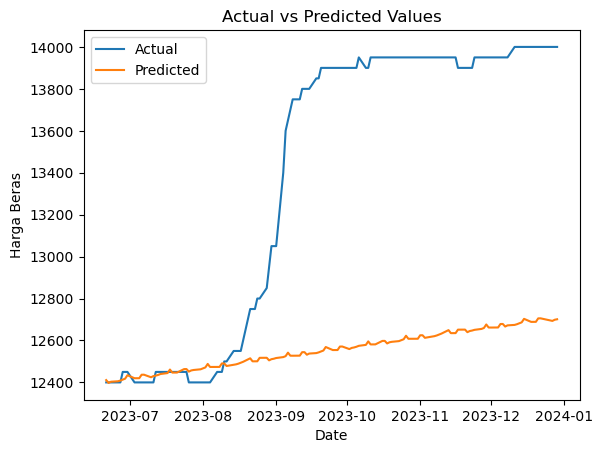

In [13]:
import matplotlib.pyplot as plt

# Plot the actual values
plt.plot(test_data.index, test_data['Harga Beras'], label='Actual')

# Plot the predicted values
plt.plot(test_data.index, forecast, label='Predicted')

plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Harga Beras')
plt.legend()

plt.show()